In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
user_profile = pd.read_csv('./data/userprofile.csv')

In [6]:
user_payments = pd.read_csv('./data/userpayment.csv')

In [8]:
user_cuisine = pd.read_csv('./data/usercuisine.csv')

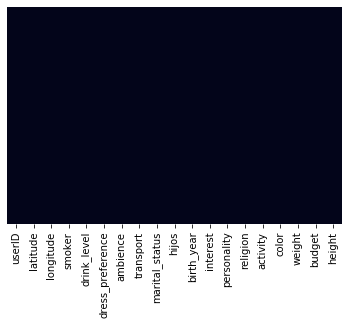

In [17]:
# Check for null values
sns.heatmap(data=user_profile.isnull(),cbar=False,yticklabels=False)

In [47]:
user_profile.tail()

userID smoker     drink_level dress_preference ambience  transport  \
133  U1134  false  casual drinker    no preference   family     public   
134  U1135  false  casual drinker         informal   family    on foot   
135  U1136   true  social drinker    no preference  friends  car owner   
136  U1137  false  social drinker           formal   family     public   
137  U1138  false  social drinker           formal  friends     public   

    marital_status  birth_year      interest          personality  religion  \
133         single        1991       variety          hard-worker  Catholic   
134         single        1988       variety  hunter-ostentatious  Catholic   
135         single        1990         retro    thrifty-protector  Catholic   
136         single        1989  eco-friendly          hard-worker  Catholic   
137         single        1991       variety    thrifty-protector      none   

    activity  budget  
133  student  medium  
134  student     low  
135  student     low  
136  student     low  
137  student  medium

In [31]:
# Drop unneccesary fetures
user_profile.drop(['latitude','longitude','religion','hijos','color','weight','height'],axis=1,inplace=True)

In [110]:
user_cuisine.tail()

userID           Rcuisine
325  U1135           Southern
326  U1135  Dessert-Ice_Cream
327  U1136            Mexican
328  U1137            Mexican
329  U1138           Pizzeria

In [112]:
# Establish users' preffered cuisine
# ***Assumption: The first cuisine is the preffered users' cuisine
def get_cuisine(userID):
    return list(user_cuisine[user_cuisine['userID'] == userID]['Rcuisine'])[0]

user_profile['preffered_cuisine'] = user_profile['userID'].apply(get_cuisine)

In [113]:
user_profile.head()

userID smoker     drink_level dress_preference ambience transport  \
0  U1001  false      abstemious         informal   family   on foot   
1  U1002  false      abstemious         informal   family    public   
2  U1003  false  social drinker           formal   family    public   
3  U1004  false      abstemious         informal   family    public   
4  U1005  false      abstemious    no preference   family    public   

  marital_status  birth_year    interest          personality  religion  \
0         single        1989     variety    thrifty-protector      none   
1         single        1990  technology  hunter-ostentatious  Catholic   
2         single        1989        none          hard-worker  Catholic   
3         single        1940     variety          hard-worker      none   
4         single        1992        none    thrifty-protector  Catholic   

       activity  budget preffered_cuisine  
0       student  medium          American  
1       student     low           Mexican  
2       student     low           Mexican  
3  professional  medium            Bakery  
4       student  medium          American